In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots

# open database use OpsimDatabase
opsdb = db.OpsimDatabase('baseline2018a.db')

# output
outDir = 'outdir'
resultsDb = db.ResultsDb(outDir=outDir)

In [2]:
class newMetric(metrics.BaseMetric):
    def __init__(self, colname, timeCol='observationStartMJD', filterCol='filter', **kwargs):
        self.colname = colname
        self.timeCol = timeCol
        self.filterCol = filterCol
        super().__init__(col=[self.colname,self.timeCol,self.filterCol],metricDtype='object',**kwargs)
        
    def run(self, dataSlice, slicePoint=None):
        # method used to calculate some quantities
        #result = {self.colname:dataSlice[self.colname],self.timeCol:dataSlice[self.timeCol],self.filterCol:dataSlice[self.filterCol]}
        result = dataSlice
        return result
        

In [28]:
ra = np.array([34.39339593])
dec = np.array([-5.09032894])

# metric, slicer, constraint
metric = newMetric(colname='fiveSigmaDepth',timeCol='observationStartMJD', filterCol='filter')
slicer = slicers.UserPointsSlicer(ra,dec)
#sqlconstraint = 'filter = "r" and night<100'
sqlconstraint = 'night<100'
# bundle
pointSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'pointSky':pointSky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)


Querying database SummaryAllProps with constraint night<100 for columns ['observationStartMJD', 'filter', 'fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 62070 visits
Running:  ['pointSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<100" constraint now.
Plotting complete.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/plots/plotHandler.py:517: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


In [29]:
type(pointSky.metricValues)

numpy.ma.core.MaskedArray

In [30]:
outDict = pointSky.metricValues[0]

In [32]:
mag = outDict['fiveSigmaDepth']
time = outDict['observationStartMJD']
filters = outDict['filter']

In [33]:
len(mag)

1184

In [35]:
f = np.unique(filters)
f

array(['g', 'i', 'r', 'u', 'y', 'z'],
      dtype='<U256')

In [38]:
np.where(filters =='r')

(array([  67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,  118,  123,
         143,  174,  179,  182,  185,  187,  200,  206,  213,  216,  220,
         221,  223,  224,  225,  233,  238,  252,  265,  266,  270,  291,
         292,  294,  301,  302,  306,  307,  309,  310,  316,  323,  324,
         325,  330,  364,  370,  423,  437,  439,  441,  456,  463,  542,
         543,  553,  567,  570,  572,  573,  609,  610,  618,  619,  622,
         627,  629,  640,  653,  654,  660,  661,  670,  671,  672,  673,
         685,  689,  699,  701,  703,  704,  708,  709,  716,  718,  719,
         720,  721,  722,  723,  727,  730,  731,  732,  733,  738,  739,
         741,  742,  743,  744,  747,  748,  749,  750,  751,  752,  753,
         754,  755,  756,  757,  758,  759,  760,  761,  762,  763,  764,
         765,  766,  767,  768,  773,  774,  775,  776,  778,  779,  780,
         785,  786,  787,  788,  792, 

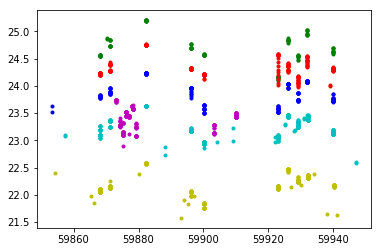

In [60]:
colors = {'g':'g', 'i':'b','r':'r', 'u':'m', 'y':'y', 'z':'c'}
for fi in f:
    match = np.where(filters==fi)
    timei = time[match]
    magi = mag[match]
    plt.plot(timei,magi,'.',color=colors[fi])

### fit a model

In [109]:
from scipy.optimize import curve_fit

def lcmodel(x,a,b,c):
    return c*(np.sin(a*x + b)+1)


In [110]:
timer = time[np.where(filters=='r')]
magr = mag[np.where(filters=='r')]

popt,pcov = curve_fit(lcmodel, xdata=timer, ydata=magr)



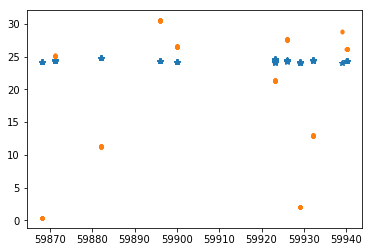

In [112]:
magfit = lcmodel(timer,*popt)

plt.plot(timer,magr,'*',timer,magfit,'.')


In [86]:
popt

array([  9.78889492e-01,   1.26520267e+03,  -2.26189409e+01])

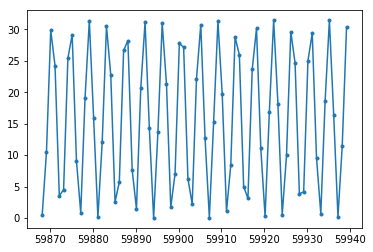

In [107]:
timer = np.arange(timer.min(),timer.max(),1)
magfit = lcmodel(timer,*popt)
plt.plot(timer,magfit,'.-')

In [93]:
time.min()

59853.282893518517

In [43]:
class sliceMetric(metrics.BaseMetric):
    def __init__(self, colname, timeCol='observationStartMJD', filterCol='filter', **kwargs):
        self.colname = colname
        self.timeCol = timeCol
        self.filterCol = filterCol
        super().__init__(col=[self.colname,self.timeCol,self.filterCol],metricDtype='object',**kwargs)
        
    def run(self, dataSlice, slicePoint=None):
        # method used to calculate some quantities
        #result = {self.colname:dataSlice[self.colname],self.timeCol:dataSlice[self.timeCol],self.filterCol:dataSlice[self.filterCol]}
        result = dataSlice # return dataSlice directly
        return result
 

In [44]:
ra = np.array([34.39339593])
dec = np.array([-5.09032894])

# metric, slicer, constraint
metric = sliceMetric(colname='fiveSigmaDepth',timeCol='observationStartMJD', filterCol='filter')
slicer = slicers.UserPointsSlicer(ra,dec)
#sqlconstraint = 'filter = "r" and night<100'
sqlconstraint = 'night<100'
# bundle
pointSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'pointSky':pointSky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)


Querying database SummaryAllProps with constraint night<100 for columns ['observationStartMJD', 'filter', 'fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 62070 visits
Running:  ['pointSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<100" constraint now.
Plotting complete.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/plots/plotHandler.py:517: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


In [56]:
slicedata = pointSky.metricValues[0]

In [59]:
sorteddata = slicedata.sort(order='observationStartMJD')

In [66]:
slicedata

array([( 59853.28289352, 'i',  34.393398,  23.62165748, -5.09032),
       ( 59853.29655093, 'i',  34.393398,  23.51077151, -5.09032),
       ( 59854.27238426, 'y',  34.393398,  22.39868234, -5.09032), ...,
       ( 59941.03722222, 'y',  34.393398,  21.62035004, -5.09032),
       ( 59947.04131944, 'z',  34.393398,  22.6096789 , -5.09032),
       ( 59947.05416667, 'z',  34.393398,  22.58057456, -5.09032)],
      dtype=(numpy.record, [('observationStartMJD', '<f8'), ('filter', '<U256'), ('fieldRA', '<f8'), ('fiveSigmaDepth', '<f8'), ('fieldDec', '<f8')]))

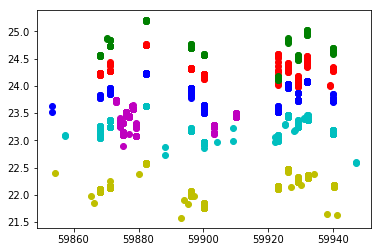

In [69]:
for i,fi in enumerate(slicedata['filter']):
    plt.plot(slicedata['observationStartMJD'][i],slicedata['fiveSigmaDepth'][i],'o',color=colors[fi])
    

In [175]:
class periodicLcMetric(metrics.BaseMetric):
    """
    observe a periodic light curve
    
    """
    def __init__(self, colname='fiveSigmaDepth', timeCol='observationStartMJD', filterCol='filter', period=10,threSNR=5,nDetect=1, **kwargs):
        self.colname = colname
        self.timeCol = timeCol
        self.filterCol = filterCol
        self.period = period
        self.threSNR = threSNR
        self.nDetect = nDetect
        super().__init__(col=[self.colname,self.timeCol,self.filterCol],**kwargs)
        
    def run(self, dataSlice, slicePoint=None):
        # method used to calculate metricValues
        # result = {self.colname:dataSlice[self.colname],self.timeCol:dataSlice[self.timeCol],self.filterCol:dataSlice[self.filterCol]}
        
        # sort the dataSlice in order of time
        dataSlice.sort(order=self.timeCol)
        
        time = dataSlice[self.timeCol]-dataSlice[self.timeCol].min()
        magsData = dataSlice[self.colname]
        magsModel = self.lcmodel(time,a=self.period,b=20,c=2)
        
        lcSNR = self.m52snr(magsModel, magsData)
        
        totalN = int(np.floor(len(time)/self.period))
        
        #print(totalN)
        lcDetect = np.ones(totalN,dtype=bool) 
        # for each light curve
        for i in np.arange(0,totalN-int(self.period),int(self.period)):
            if len(lcSNR[i:int(i+self.period)][np.where(lcSNR[i:int(i+self.period)]>self.threSNR)])<=self.nDetect:
                lcDetect[i] = False
                      
        detectedN = len(lcDetect[np.where(lcDetect==True)])
        if totalN==0:
            result = 0
        else:
            result = detectedN/totalN
            
        return float(result) 

    def lcmodel(self,x,a=10,b=20,c=2):
        # create a periodic light curve
        mags = c*np.sin(2*np.pi/a*x)+b
        return mags
    
    def m52snr(self,m,m5):
        # fiveSigmaDepth
        snr = 5.*10.**(-0.4*(m-m5))
        return snr
    
    

In [127]:
lcDetect = np.ones(10,dtype=bool)
lcDetect

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint filter = "r" and night<100 for columns ['observationStartMJD', 'filter', 'fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 8099 visits
Running:  ['periodicSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r" and night<100" constraint now.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: -0.094163  dipole: lon: 56.9234, lat: -39.6442, amp: 0.445427
Plotting complete.


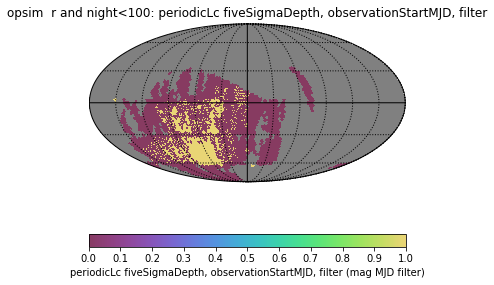

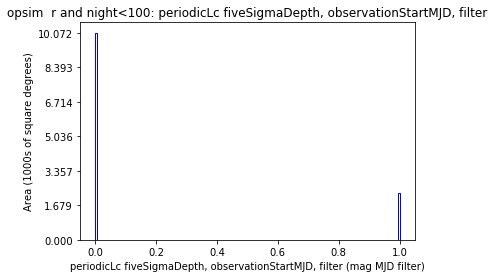

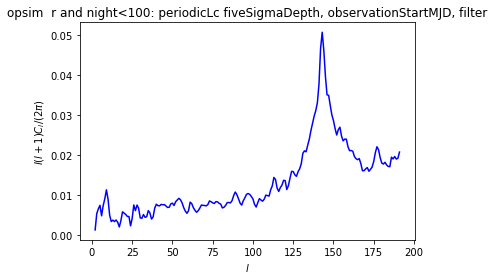

In [176]:
# metric, slicer, constraint
metric = periodicLcMetric(colname='fiveSigmaDepth', timeCol='observationStartMJD', filterCol='filter', period=10,threSNR=1,nDetect=0)
slicer = slicers.HealpixSlicer(nside = 64)
sqlconstraint = 'filter = "r" and night<100'

# bundle
periodicSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'periodicSky':periodicSky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)


In [177]:
periodicSky.metricValues

masked_array(data = [-- -- -- ..., -- -- --],
             mask = [ True  True  True ...,  True  True  True],
       fill_value = -1.6375e+30)

In [121]:
np.ceil(0.3)

1.0

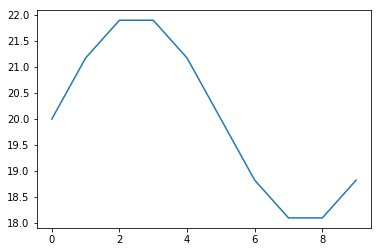

In [117]:
x = np.arange(0,10)
mags = lcmodel(10,20,2)
plt.plot(x,mags)